In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
Justo = np.genfromtxt("data.txt", delimiter=",", skip_header=1)


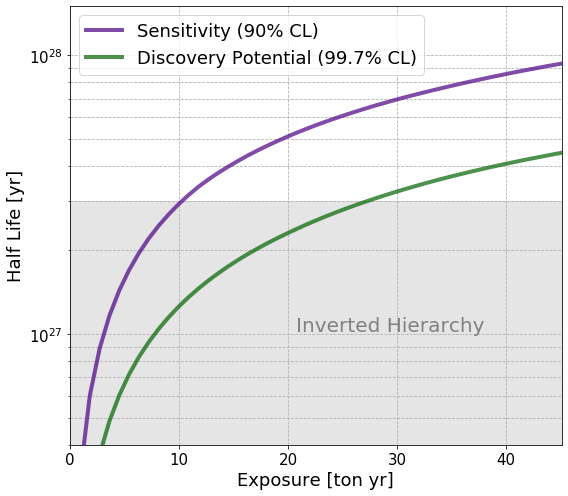

In [5]:
plt.figure(figsize=(8,7))
plt.plot(Justo[:,0]/1109,Justo[:,1],color='indigo',alpha=0.7,lw=4,label='Sensitivity (90% CL)')
plt.plot(Justo[:,0]/1109,Justo[:,2],color='DarkGreen',alpha=0.7,lw=4,label='Discovery Potential (99.7% CL)')

xxx = np.arange(0,100)
plt.fill_between(xxx, 3e26, 3e27, color='grey', alpha='0.2')
plt.text(20.7,1.02e27,'Inverted Hierarchy',fontsize=20, color='grey')
#xxx = np.arange(0,100)
#plt.fill_between(xxx, 1.8e28, 8e29, color='grey', alpha='0.2')
#plt.text(27,2.1e28,'Normal Hierarchy',fontsize=22, color='grey')

plt.legend(loc='upper left',ncol=1,fontsize=18)
plt.semilogy()
plt.xlim(0,45.1)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(4e26,1.5e28)

plt.grid(which="both",linestyle='--')
plt.xlabel('Exposure [ton yr]',fontsize=18)
plt.ylabel('Half Life [yr]',fontsize=18)
plt.tight_layout()
# plt.savefig("Sens_Justo.pdf",bbox_inches='tight')
plt.show()

In [3]:
NHD = np.load("Inputs/NEXT-HD_5_3.npy")


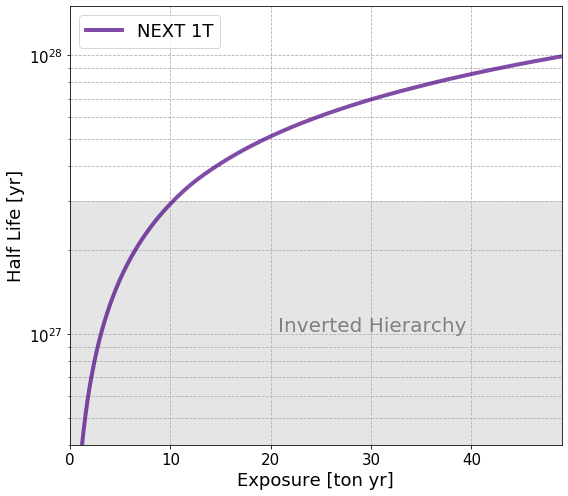

In [5]:
plt.figure(figsize=(8,7))
plt.plot(NHD[:,0]/1109,NHD[:,1],color='indigo',alpha=0.7,lw=4,label='NEXT 1T')

xxx = np.arange(0,100)
plt.fill_between(xxx, 3e26, 3e27, color='grey', alpha='0.2')
plt.text(20.7,1.02e27,'Inverted Hierarchy',fontsize=20, color='grey')
#xxx = np.arange(0,100)
#plt.fill_between(xxx, 1.8e28, 8e29, color='grey', alpha='0.2')
#plt.text(27,2.1e28,'Normal Hierarchy',fontsize=22, color='grey')

plt.legend(loc='upper left',ncol=1,fontsize=18)
plt.semilogy()
plt.xlim(0,49)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(4e26,1.5e28)

plt.grid(which="both",linestyle='--')
plt.xlabel('Exposure [ton yr]',fontsize=18)
plt.ylabel('Half Life [yr]',fontsize=18)
plt.tight_layout()
#plt.savefig("Sens.pdf",bbox_inches='tight')
plt.show()

In [2]:
# import the sensitivity cuves and find the band boundries 
HDF_7_10 = np.load("Inputs/HD-F-7-10.npy")
HDF_7_3  = np.load("Inputs/HD-F-7-3.npy")
HDP_7_10 = np.load("Inputs/HD-P-7-10.npy")
HDP_7_3  = np.load("Inputs/HD-P-7-3.npy")
Pure_Xenon  = []
Mixed_Xenon = []
for x in range(0,len(HDP_7_10[:,0])):
    Pur = [HDF_7_10[:,1][x],HDP_7_10[:,1][x]]
    Mix = [HDF_7_3[:,1][x],HDP_7_3[:,1][x]]
    Pure_Xenon.append([ HDP_7_10[:,0][x]/1109 , min(Pur) , max(Pur)])
    Mixed_Xenon.append([ HDP_7_10[:,0][x]/1109 , min(Mix) , max(Mix)])
Pure_Xenon = np.array(Pure_Xenon)
Mixed_Xenon = np.array(Mixed_Xenon)

/Users/austinmcdonald/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:63: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


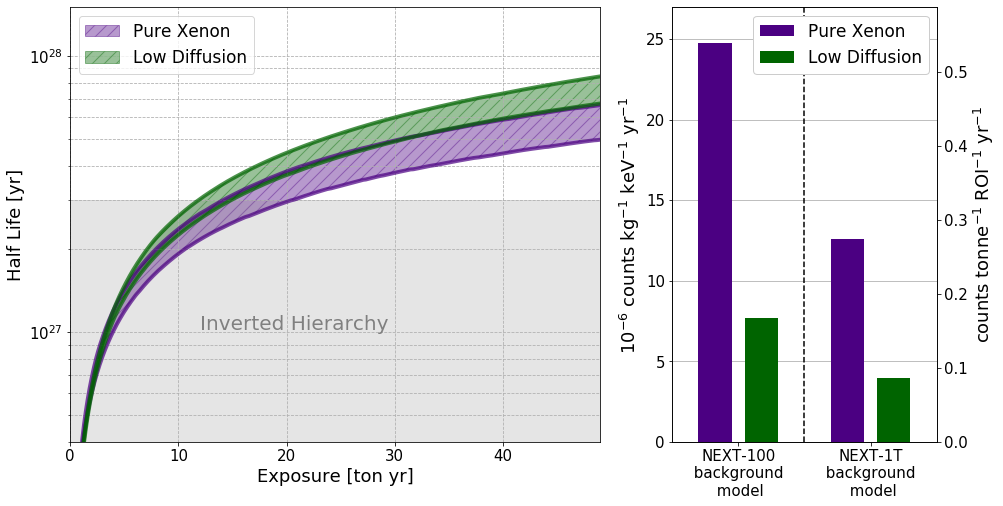

In [3]:

fig5 = plt.figure(constrained_layout=False,figsize=(28,8))
widths  = [3, 1.5]
heights = [1]
spec5 = fig5.add_gridspec(ncols=2, nrows=1, width_ratios=widths, height_ratios=heights,
                         left=0.05, right=0.48, wspace=0.18, hspace=0.05)

ax1 = fig5.add_subplot(spec5[0, 0])
ax2 = fig5.add_subplot(spec5[0, 1])


ax1.plot(Pure_Xenon[:,0],Pure_Xenon[:,1],color='indigo',alpha=0.7,lw=4)
ax1.plot(Pure_Xenon[:,0],Pure_Xenon[:,2],color='indigo',alpha=0.7,lw=4)
ax1.fill_between(Pure_Xenon[:,0],Pure_Xenon[:,1],Pure_Xenon[:,2]
                 ,hatch='//',color='indigo',alpha=0.4,edgecolor='none'
                 , label="Pure Xenon")

ax1.plot(Mixed_Xenon[:,0],Mixed_Xenon[:,1],color='DarkGreen',alpha=0.7,lw=4)
ax1.plot(Mixed_Xenon[:,0],Mixed_Xenon[:,2],color='DarkGreen',alpha=0.7,lw=4)
ax1.fill_between(Mixed_Xenon[:,0],Mixed_Xenon[:,1],Mixed_Xenon[:,2]
                 ,hatch='//',color='DarkGreen',alpha=0.4,edgecolor='none'
                 , label="Low Diffusion")


xxx = np.arange(0,100)
ax1.fill_between(xxx, 3e26, 3e27, color='grey', alpha='0.2')
ax1.text(12,1.02e27,'Inverted Hierarchy',fontsize=20, color='grey',ha='left')

ax1.legend(loc='upper left',ncol=1,fontsize=17)
ax1.semilogy()
ax1.set_xlim(0,49)
ax1.set_ylim(4e26,1.5e28)
ax1.tick_params(axis="both", labelsize=15)
ax1.grid(which="both",linestyle='--')
ax1.set_xlabel('Exposure [ton yr]',fontsize=18)
ax1.set_ylabel('Half Life [yr]',fontsize=18)


ConvFactor=0.54/2.48/10
Posns=np.array((1.15,1.85,3.15,3.85))
BackgroundIndices=np.array([2.48,0.77,1.26,0.4])*10

ax2.bar(Posns[[0,2]],BackgroundIndices[[0,2]],width=0.5,color='indigo',label='Pure Xenon',zorder=3)
ax2.bar(Posns[[1,3]],BackgroundIndices[[1,3]],width=0.5,color='DarkGreen',label='Low Diffusion',zorder=3)

ax2.plot([2.5,2.5],[0,27],'--',color='black')
ax2.set_ylim(0,27)
ax2.set_xlim(0.5,4.5)
ax2.set_ylabel(r"$10^{-6}$ counts kg$^{-1}$ keV$^{-1}$ yr$^{-1}$ ",fontsize=18)
ax2.set_xticks([1.5,3.5])
ax2.set_xticklabels(["NEXT-100\n background \n model","NEXT-1T\n background \n model"])
ax2.legend(loc='upper right',framealpha=1,fontsize=17)
ax2.tick_params(axis="y", labelsize=15)
ax2.tick_params(axis="x", labelsize=15)

ax=plt.gca()
ax.yaxis.grid()
ax3=ax.twinx()
ax3.set_ylim(0,27*ConvFactor)
ax3.set_ylabel(r"counts tonne$^{-1}$ ROI$^{-1}$ yr$^{-1}$",fontsize=18)
ax3.tick_params(axis="y", labelsize=15)


plt.tight_layout()
#plt.savefig("Sensitivity_Combo.png",bbox_inches='tight',dpi=400)
#plt.savefig("Sensitivity_Combo.pdf",bbox_inches='tight')
plt.show()

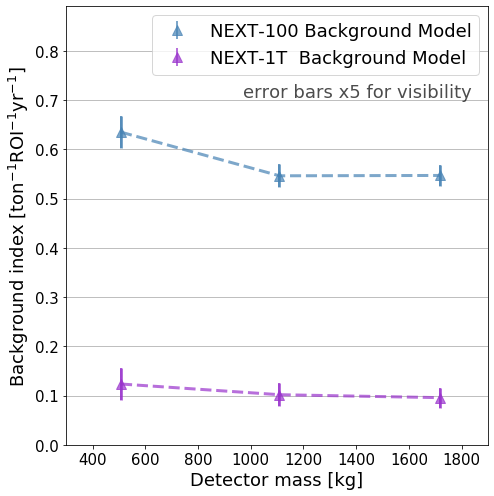

In [4]:
plt.figure(figsize=(7,7))
m = [508,1109,1717]

# 2 plots so the legend dose not have the line in it
# NEXT 100 model
b   = np.array([ 6.347e-01, 5.461e-01 ,5.468e-01 ])
ber = np.array([ 6.486e-03 , 4.596e-03 , 4.094e-03 ])
plt.errorbar(m,b,yerr=ber*5,label='NEXT-100 Background Model'
             ,color='steelblue',marker='^',lw=0,elinewidth=2,alpha=0.7,ms=10)
plt.errorbar(m,b,yerr=ber*5
             ,color='steelblue',marker=None,alpha=0.7,ms=0,ls='--',lw=3)

# NEXT HD model
b  = np.array([ 1.234e-01, 1.017e-01 ,9.571e-02 ])
ber = np.array([ 6.486e-03 , 4.596e-03 , 4.094e-03 ])
plt.errorbar(m,b,yerr=ber*5,label='NEXT-1T  Background Model'
             ,color='darkorchid',marker='^',lw=0,elinewidth=2,alpha=0.7,ms=10)
plt.errorbar(m,b,yerr=ber*5
             ,color='darkorchid',marker=None,alpha=0.7,ms=0,ls='--',lw=3)

plt.text(970,0.705,'error bars x5 for visibility',fontsize=18, color='k',alpha=0.7)

plt.legend(loc='upper right',fontsize=18)
plt.xlabel(r'Detector mass [kg]',fontsize=18)
plt.ylabel(r"Background index [ton$^{-1}$ROI$^{-1}$yr$^{-1}$]",fontsize=18)
plt.tick_params(axis="x", labelsize=15)
plt.tick_params(axis="y", labelsize=15)

ax=plt.gca()
ax.yaxis.grid()
plt.ylim(0.0,0.89)
plt.xlim(300,1899)

plt.tight_layout()
#plt.savefig("back-scaling.png",bbox_inches='tight',dpi=400)
#plt.savefig("back-scaling.pdf",bbox_inches='tight')
plt.show()

In [12]:
TIME = np.linspace(1,365*300,10000)/365
TIME

array([2.73972603e-03, 3.27424523e-02, 6.27451786e-02, ...,
       2.99939995e+02, 2.99969997e+02, 3.00000000e+02])

In [9]:
max(HDF_7_10[:,0])

55450.0

In [15]:
HDPurenext100 = np.load("/Users/austinmcdonald/projects/bb0nu_sens/HD-Pure-next100.npy")
HDPurenextHD  = np.load("/Users/austinmcdonald/projects/bb0nu_sens/HD-Pure-nextHD.npy")
HDLownext100  = np.load("/Users/austinmcdonald/projects/bb0nu_sens/HD-Low-next100.npy")
HDLownextHD   = np.load("/Users/austinmcdonald/projects/bb0nu_sens/HD-Low-nextHD.npy")


In [12]:
HDPurenext100 = np.load("/Users/austinmcdonald/projects/bb0nu_sens/HD-Pure-next100_ass.npy")
HDPurenextHD  = np.load("/Users/austinmcdonald/projects/bb0nu_sens/HD-Pure-nextHD_ass.npy")
HDLownext100  = np.load("/Users/austinmcdonald/projects/bb0nu_sens/HD-Low-next100_ass.npy")
HDLownextHD   = np.load("/Users/austinmcdonald/projects/bb0nu_sens/HD-Low-nextHD_ass.npy")


In [10]:
extreme   = np.load("/Users/austinmcdonald/projects/bb0nu_sens/HD-extreme.npy")


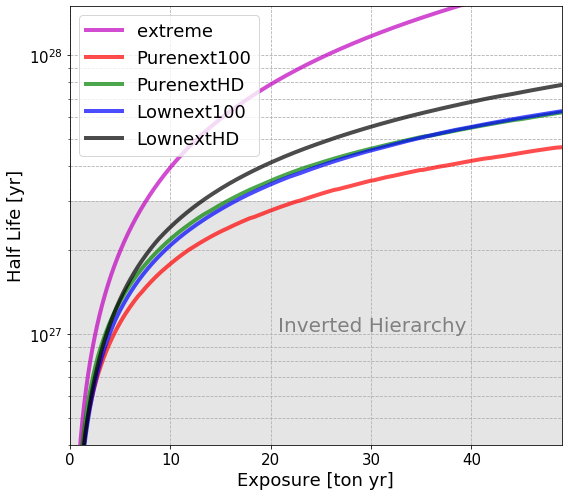

In [16]:
plt.figure(figsize=(8,7))
plt.plot(extreme[:,0]/1109,extreme[:,1],color='m',alpha=0.7,lw=4,label='extreme')

plt.plot(HDPurenext100[:,0]/1000,HDPurenext100[:,1],color='r',alpha=0.7,lw=4,label='Purenext100')
plt.plot(HDPurenextHD[:,0]/1000,HDPurenextHD[:,1],color='g',alpha=0.7,lw=4,label='PurenextHD')


plt.plot(HDLownext100[:,0]/1000,HDLownext100[:,1],color='b',alpha=0.7,lw=4,label='Lownext100')
plt.plot(HDLownextHD[:,0]/1000,HDLownextHD[:,1],color='k',alpha=0.7,lw=4,label='LownextHD')


xxx = np.arange(0,100)
plt.fill_between(xxx, 3e26, 3e27, color='grey', alpha='0.2')
plt.text(20.7,1.02e27,'Inverted Hierarchy',fontsize=20, color='grey')

plt.legend(loc='upper left',ncol=1,fontsize=18)
plt.semilogy()
plt.xlim(0,49)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(4e26,1.5e28)
plt.grid(which="both",linestyle='--')
plt.xlabel('Exposure [ton yr]',fontsize=18)
plt.ylabel('Half Life [yr]',fontsize=18)
plt.tight_layout()
plt.show()

/Users/austinmcdonald/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:62: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


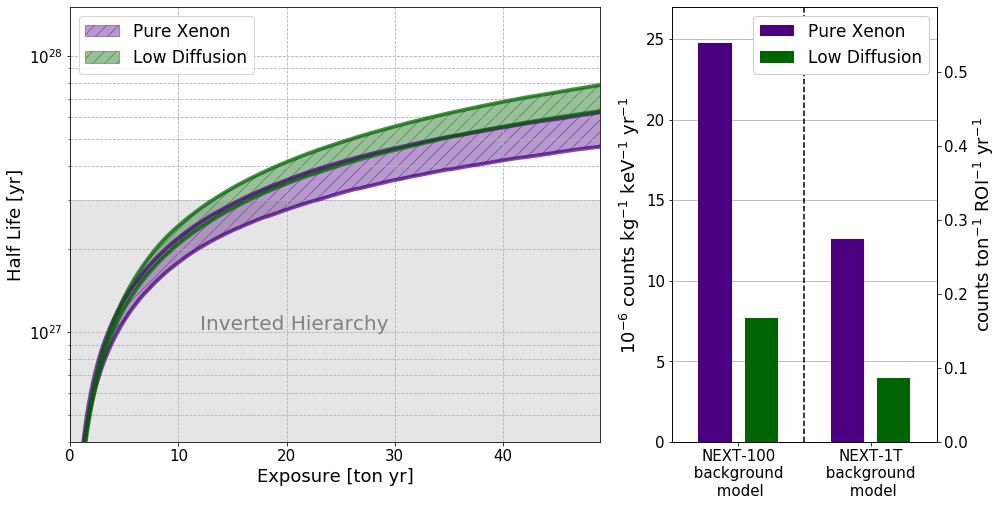

In [10]:

fig5 = plt.figure(constrained_layout=False,figsize=(28,8))
widths  = [3, 1.5]
heights = [1]
spec5 = fig5.add_gridspec(ncols=2, nrows=1, width_ratios=widths, height_ratios=heights,
                         left=0.05, right=0.48, wspace=0.18, hspace=0.05)

ax1 = fig5.add_subplot(spec5[0, 0])
ax2 = fig5.add_subplot(spec5[0, 1])

ax1.plot(HDPurenext100[:,0]/1000,HDPurenext100[:,1],color='indigo',alpha=0.7,lw=4)
ax1.plot(HDPurenextHD[:,0]/1000,HDPurenextHD[:,1]  ,color='indigo',alpha=0.7,lw=4)
ax1.fill_between(HDPurenext100[:,0]/1000,HDPurenext100[:,1],HDPurenextHD[:,1]
                 ,hatch='//',color='indigo',alpha=0.4,edgecolor='none'
                 , label="Pure Xenon")

ax1.plot(HDLownext100[:,0]/1000,HDLownext100[:,1],color='DarkGreen',alpha=0.7,lw=4)
ax1.plot(HDLownextHD[:,0]/1000 ,HDLownextHD[:,1] ,color='DarkGreen',alpha=0.7,lw=4)
ax1.fill_between(HDLownext100[:,0]/1000,HDLownext100[:,1],HDLownextHD[:,1]
                 ,hatch='//',color='DarkGreen',alpha=0.4,edgecolor='none'
                 , label="Low Diffusion")


xxx = np.arange(0,100)
ax1.fill_between(xxx, 3e26, 3e27, color='grey', alpha='0.2')
ax1.text(12,1.02e27,'Inverted Hierarchy',fontsize=20, color='grey',ha='left')

ax1.legend(loc='upper left',ncol=1,fontsize=17)
ax1.semilogy()
ax1.set_xlim(0,49)
ax1.set_ylim(4e26,1.5e28)
ax1.tick_params(axis="both", labelsize=15)
ax1.grid(which="both",linestyle='--')
ax1.set_xlabel('Exposure [ton yr]',fontsize=18)
ax1.set_ylabel('Half Life [yr]',fontsize=18)


ConvFactor=0.54/2.48/10
Posns=np.array((1.15,1.85,3.15,3.85))
BackgroundIndices=np.array([2.48,0.77,1.26,0.4])*10

ax2.bar(Posns[[0,2]],BackgroundIndices[[0,2]],width=0.5,color='indigo',label='Pure Xenon',zorder=3)
ax2.bar(Posns[[1,3]],BackgroundIndices[[1,3]],width=0.5,color='DarkGreen',label='Low Diffusion',zorder=3)

ax2.plot([2.5,2.5],[0,27],'--',color='black')
ax2.set_ylim(0,27)
ax2.set_xlim(0.5,4.5)
ax2.set_ylabel(r"$10^{-6}$ counts kg$^{-1}$ keV$^{-1}$ yr$^{-1}$ ",fontsize=18)
ax2.set_xticks([1.5,3.5])
ax2.set_xticklabels(["NEXT-100\n background \n model","NEXT-1T\n background \n model"])
ax2.legend(loc='upper right',framealpha=1,fontsize=17)
ax2.tick_params(axis="y", labelsize=15)
ax2.tick_params(axis="x", labelsize=15)

ax=plt.gca()
ax.yaxis.grid()
ax3=ax.twinx()
ax3.set_ylim(0,27*ConvFactor)
ax3.set_ylabel(r"counts ton$^{-1}$ ROI$^{-1}$ yr$^{-1}$",fontsize=18)
ax3.tick_params(axis="y", labelsize=15)


plt.tight_layout()
#plt.savefig("Sensitivity_Combo.png",bbox_inches='tight',dpi=400)
#plt.savefig("Sensitivity_Combo.pdf")
plt.show()

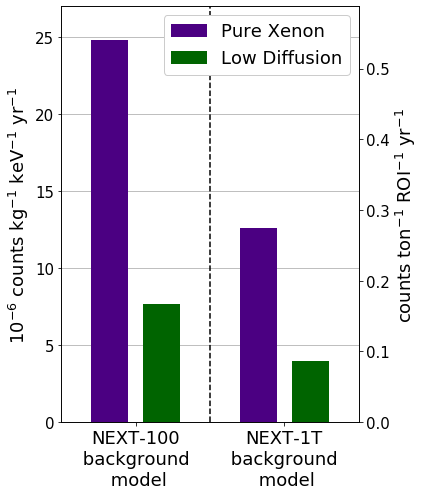

In [11]:
plt.figure(figsize=(6,7))

ConvFactor=0.54/2.48/10
Posns=np.array((1.15,1.85,3.15,3.85))
BackgroundIndices=np.array([2.48,0.77,1.26,0.4])*10
BackgroundIndices=np.array([24.8,7.7,12.6,4])

plt.bar(Posns[[0,2]],BackgroundIndices[[0,2]],width=0.5,color='indigo',label='Pure Xenon',zorder=3)

plt.bar(Posns[[1,3]],BackgroundIndices[[1,3]],width=0.5,color='DarkGreen',label='Low Diffusion',zorder=3)

plt.plot([2.5,2.5],[0,27],'--',color='black')
plt.ylim(0,27)
plt.xlim(0.5,4.5)
plt.ylabel(r"$10^{-6}$ counts kg$^{-1}$ keV$^{-1}$ yr$^{-1}$ ",fontsize=18)
plt.xticks([1.5,3.5],["NEXT-100\n background \n model","NEXT-1T\n background \n model"],fontsize=18)
plt.legend(loc='upper right',framealpha=1,fontsize=18)
plt.tick_params(axis="y", labelsize=15)
#plt.title("Background Index")

ax=plt.gca()
ax.yaxis.grid()
ax2=ax.twinx()
ax2.set_ylim(0,27*ConvFactor)
ax2.set_ylabel(r"counts ton$^{-1}$ ROI$^{-1}$ yr$^{-1}$",fontsize=18)
ax2.tick_params(axis="y", labelsize=15)
plt.tight_layout()
plt.show()